In [6]:
import pandas as pd

# Specify the correct file paths
math_path = "C:/Users/linka/Downloads/student+performance/student/student-mat.csv"
por_path = "C:/Users/linka/Downloads/student+performance/student/student-por.csv"

# Load the datasets with the correct delimiter
df_math = pd.read_csv(math_path, delimiter=';')
df_por = pd.read_csv(por_path, delimiter=';')

# Check the first few rows to confirm the data is loaded correctly
print(df_math.head())
print(df_por.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [8]:
# Math dataset
X_math = df_math.drop('G3', axis=1)  
y_math = df_math['G3']               

# Portuguese dataset
X_por = df_por.drop('G3', axis=1)
y_por = df_por['G3']
X_math_encoded = pd.get_dummies(X_math, drop_first=True)


X_por_encoded = pd.get_dummies(X_por, drop_first=True)


print(X_math_encoded.head())
print(X_por_encoded.head())


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [9]:
from sklearn.model_selection import train_test_split

# Math dataset split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math_encoded, y_math, test_size=0.2, random_state=42)

# Portuguese dataset split
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por_encoded, y_por, test_size=0.2, random_state=42)


## Train Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
# Math dataset
model_math = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed
model_math.fit(X_train_math, y_train_math)

# Portuguese dataset
model_por = DecisionTreeRegressor(max_depth=5, random_state=42)
model_por.fit(X_train_por, y_train_por)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, dataset_name="Dataset"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{dataset_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return {"Mean Squared Error": mse, "R² Score": r2}


In [13]:
results_math = evaluate_model(model_math, X_test_math, y_test_math, dataset_name="Math Dataset")
results_por = evaluate_model(model_por, X_test_por, y_test_por, dataset_name="Portuguese Dataset")



Math Dataset
Mean Squared Error: 6.09
R² Score: 0.70

Portuguese Dataset
Mean Squared Error: 1.78
R² Score: 0.82


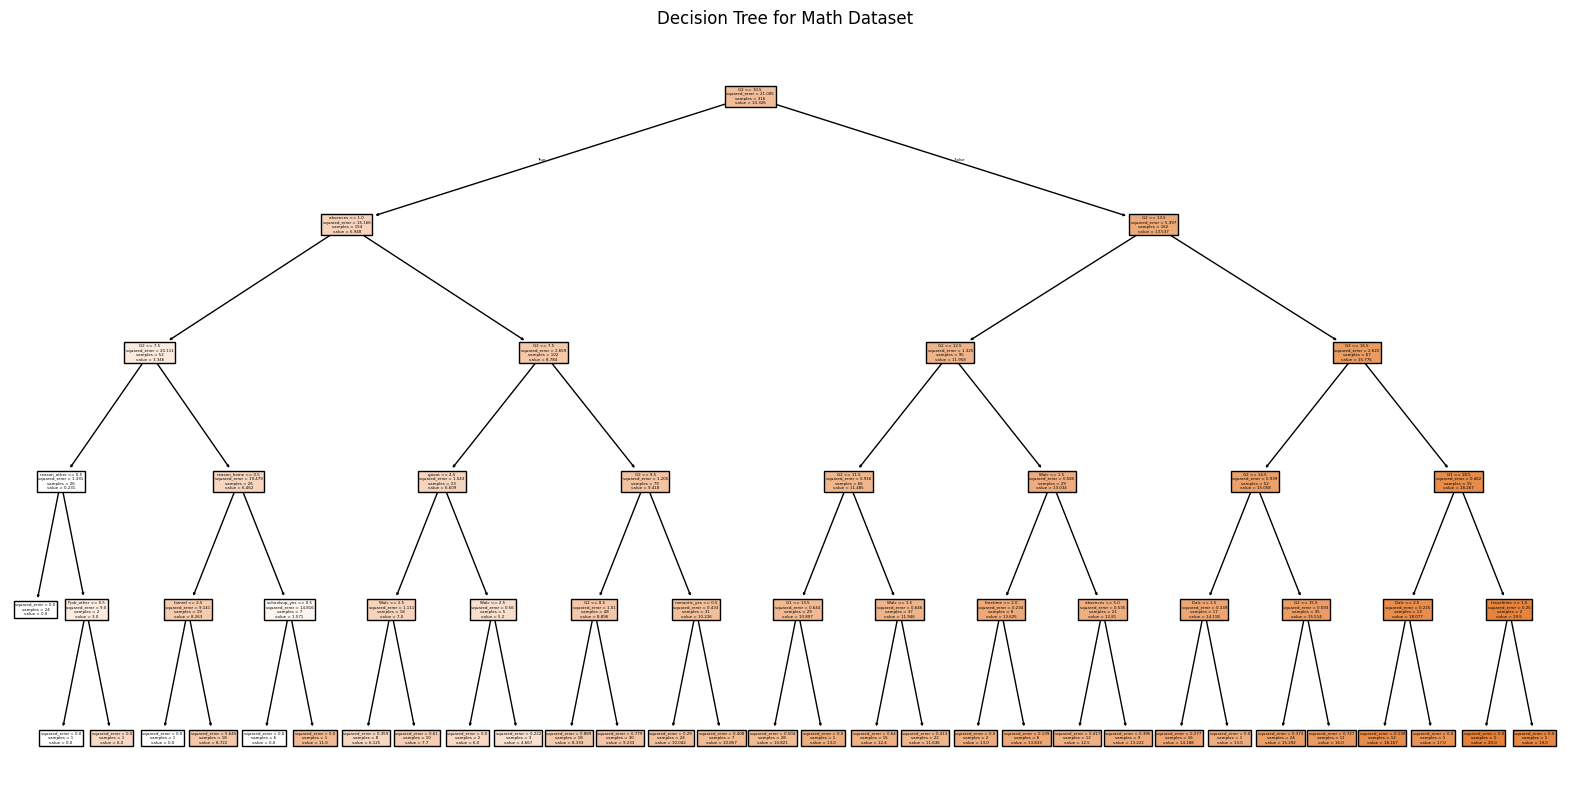

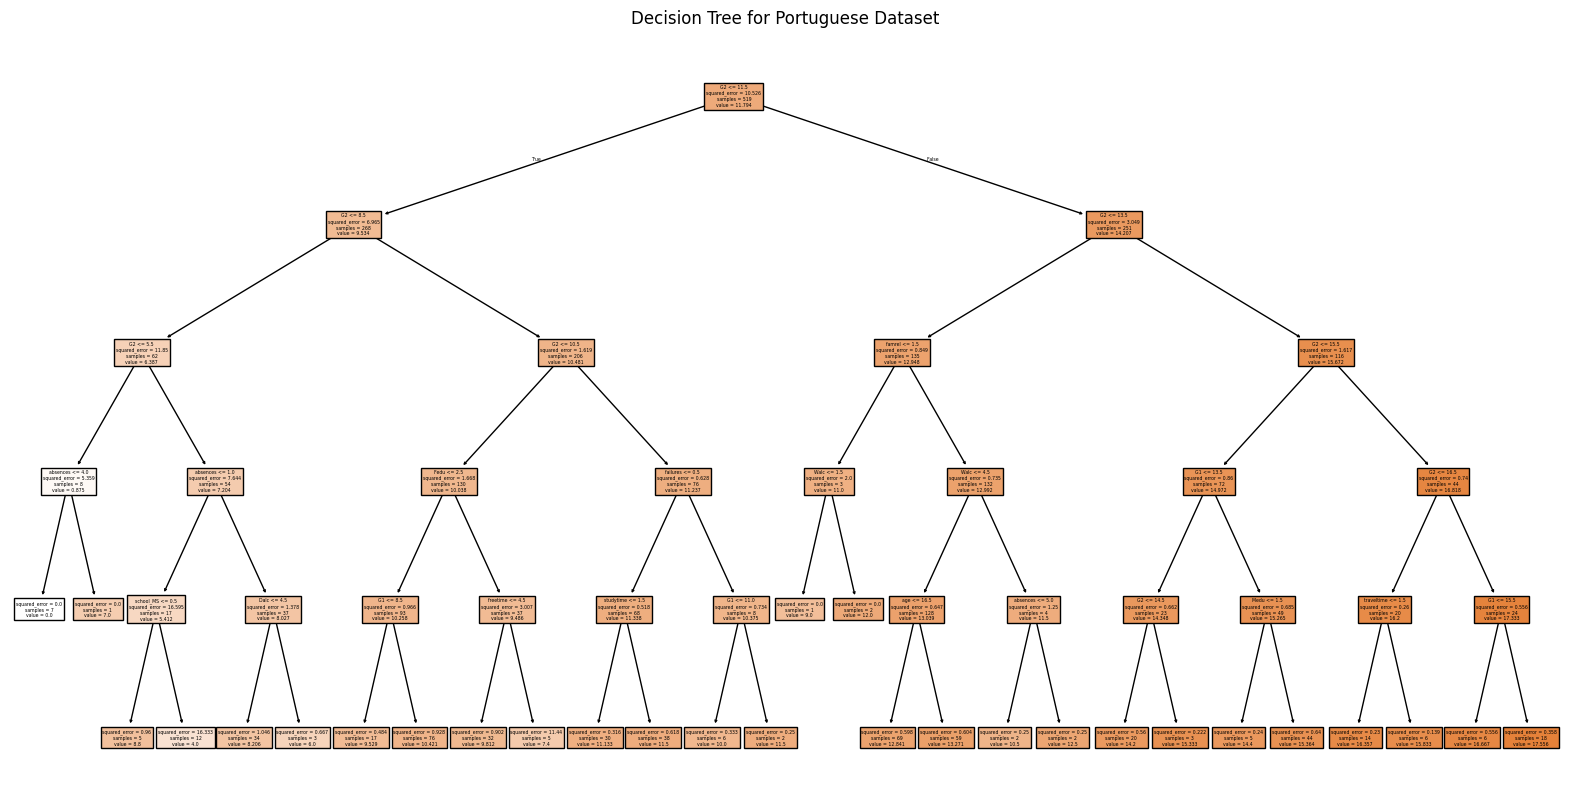

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize Math decision tree
plt.figure(figsize=(20,10))
plot_tree(model_math, feature_names=X_math_encoded.columns, filled=True)
plt.title("Decision Tree for Math Dataset")
plt.show()

# Visualize Portuguese decision tree
plt.figure(figsize=(20,10))
plot_tree(model_por, feature_names=X_por_encoded.columns, filled=True)
plt.title("Decision Tree for Portuguese Dataset")
plt.show()


In [15]:
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Simplified tree visualization
def simplified_tree_plot(model, feature_names, title="Decision Tree"):
    plt.figure(figsize=(12, 8))
    plot_tree(
        model,
        feature_names=feature_names,  # Show feature names
        filled=True,                  # Fill with color
        rounded=True,                 # Rounded boxes for better aesthetics
        max_depth=4,                  # Control the depth for readability
        proportion=False              # No percentages needed
    )
    plt.title(title)
    plt.show()
   


In [16]:
from sklearn.tree import export_text

# For Math Dataset
print("Decision Tree - Math Dataset")
tree_math_text = export_text(model_math, feature_names=X_math_encoded.columns.tolist())
print(tree_math_text)

# For Portuguese Dataset
print("\nDecision Tree - Portuguese Dataset")
tree_por_text = export_text(model_por, feature_names=X_por_encoded.columns.tolist())
print(tree_por_text)



Decision Tree - Math Dataset
|--- G2 <= 10.50
|   |--- absences <= 1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- reason_other <= 0.50
|   |   |   |   |--- value: [0.00]
|   |   |   |--- reason_other >  0.50
|   |   |   |   |--- Fjob_other <= 0.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- Fjob_other >  0.50
|   |   |   |   |   |--- value: [6.00]
|   |   |--- G2 >  7.50
|   |   |   |--- reason_home <= 0.50
|   |   |   |   |--- famrel <= 2.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- famrel >  2.50
|   |   |   |   |   |--- value: [8.72]
|   |   |   |--- reason_home >  0.50
|   |   |   |   |--- schoolsup_yes <= 0.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- schoolsup_yes >  0.50
|   |   |   |   |   |--- value: [11.00]
|   |--- absences >  1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- goout <= 4.50
|   |   |   |   |--- Walc <= 2.50
|   |   |   |   |   |--- value: [6.12]
|   |   |   |   |--- Walc >  2.50
|   |   |   |   |   |--- value: [7

## Layers 3-8

$$
R_\alpha(T) = R(T) + \alpha |T|
$$


In [17]:
def compute_regularized_risk(model, X_test, y_test, alpha):
    mse = mean_squared_error(y_test, model.predict(X_test))
    n_leaves = model.get_n_leaves()  # Number of leaves
    return mse + alpha * n_leaves

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


depths = range(3, 9)  # Tree depths from 3 to 8
alpha = 0.1  # Regularization parameter

# Store results
results = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_math, y_train_math)
    
    # Compute metrics
    mse = mean_squared_error(y_test_math, model.predict(X_test_math))
    r2 = model.score(X_test_math, y_test_math)
    regularized_risk = compute_regularized_risk(model, X_test_math, y_test_math, alpha)
    
    
    results.append({"Depth": depth, "MSE": mse, "R²": r2, "Regularized Risk": regularized_risk})

import pandas as pd
results_df = pd.DataFrame(results)

# Display 
print(results_df)


   Depth       MSE        R²  Regularized Risk
0      3  4.703328  0.770626          5.503328
1      4  6.198189  0.697724          7.798189
2      5  6.087315  0.703131          9.187315
3      6  4.272236  0.791650          9.172236
4      7  4.299028  0.790343         11.999028
5      8  5.546067  0.729527         15.446067


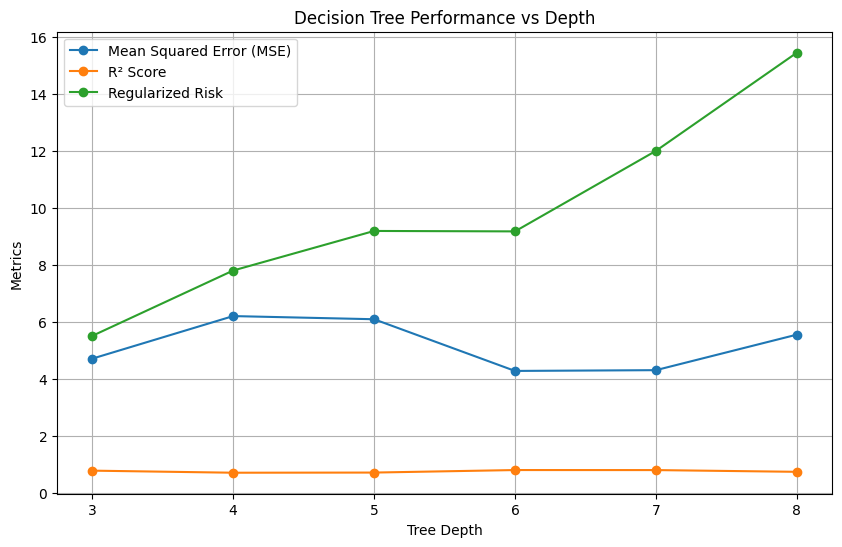

In [26]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))

# Plot MSE
plt.plot(results_df['Depth'], results_df['MSE'], marker='o', label='Mean Squared Error (MSE)')

# Plot R² Score
plt.plot(results_df['Depth'], results_df['R²'], marker='o', label='R² Score')

# Plot Regularized Risk
plt.plot(results_df['Depth'], results_df['Regularized Risk'], marker='o', label='Regularized Risk')

# Add labels, title, and legend
plt.title('Decision Tree Performance vs Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()
